## Library imports

In [88]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, classification_report, confusion_matrix




In [ ]:
data = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [7]:
# separate features into numeric and categorical
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [x for x in data.select_dtypes(exclude=[np.number]).columns.tolist() if x!='NObeyesdad']
target_variable = 'NObeyesdad'
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Target variable:", target_variable)


# subsets for convenience
data_numeric = data[numeric_features].copy()
data_categorical = data[categorical_features].copy()

print("\nNumeric shape:", data_numeric.shape)
print("Categorical shape:", data_categorical.shape)

# numeric columns with few unique values (potentially categorical)
potential_categorical_numeric = [c for c in numeric_features if data[c].nunique() <30]
print("\nNumeric cols with <10 unique values (consider reviewing):", potential_categorical_numeric)

Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Target variable: NObeyesdad

Numeric shape: (2111, 8)
Categorical shape: (2111, 8)

Numeric cols with <10 unique values (consider reviewing): []


<Axes: xlabel='NObeyesdad'>

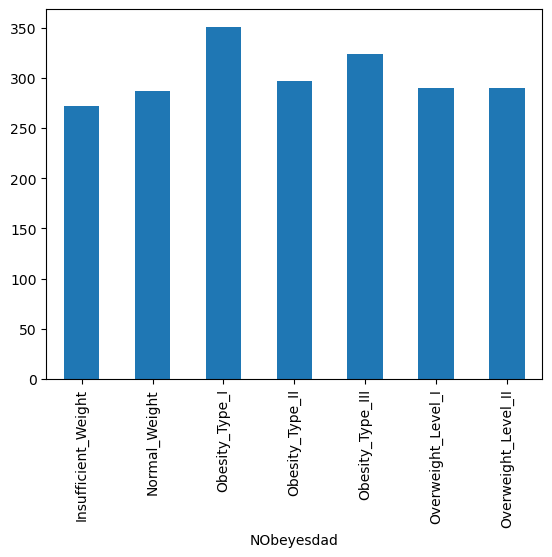

In [8]:
data.groupby('NObeyesdad').size().plot(kind='bar')

In [9]:
data.groupby('NObeyesdad').size().head(10)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64

The classes are not imbalanced!

In [10]:
# FCVC
data.groupby('FCVC').size().head(10)


FCVC
1.000000    33
1.003566     1
1.005578     1
1.008760     1
1.031149     1
1.036159     1
1.036414     1
1.052699     1
1.053534     1
1.063449     1
dtype: int64

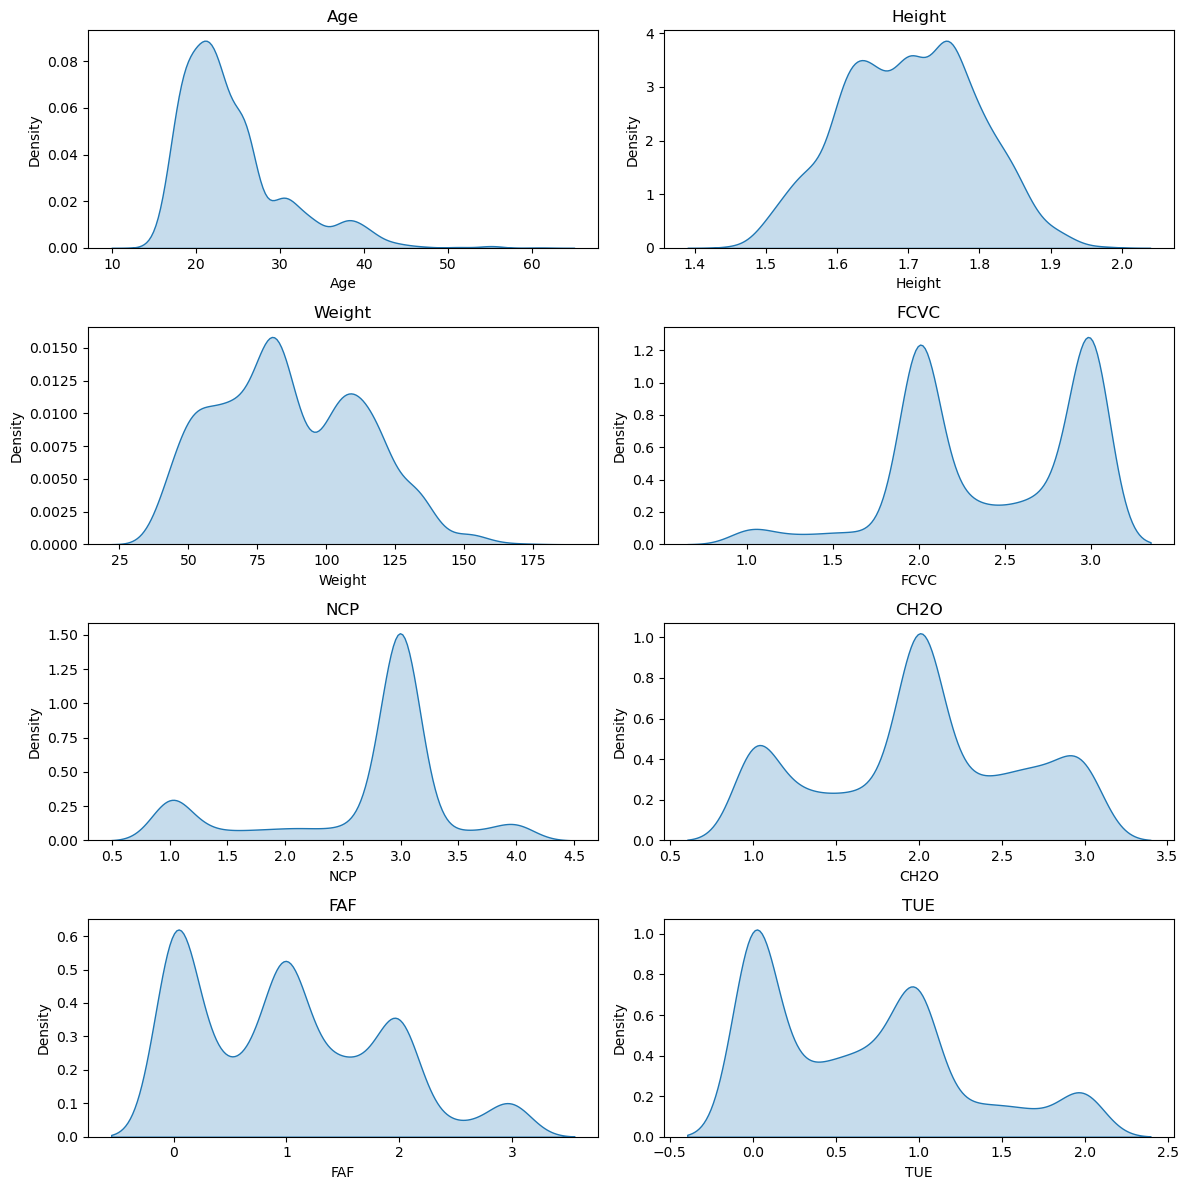

In [11]:
# kernel density plots for all numeric features
n = len(numeric_features)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_features):
    sns.kdeplot(data[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_ylabel('Density')

# remove unused axes (if any)
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

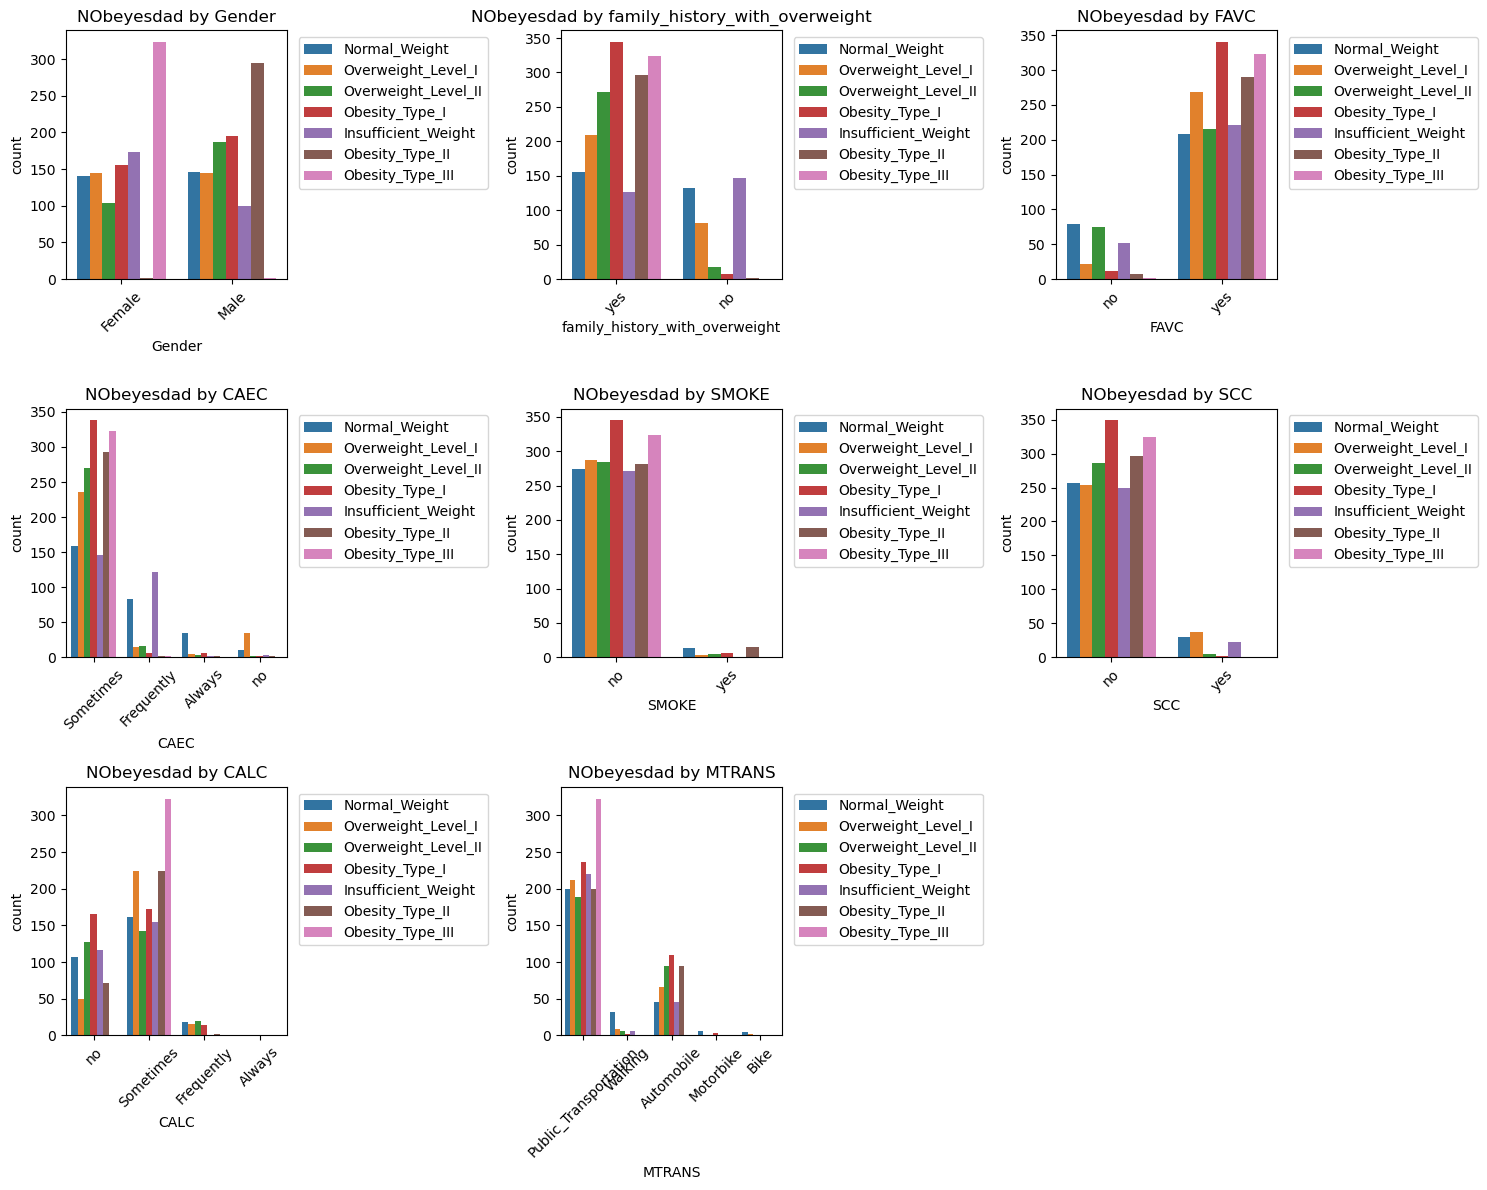

In [12]:
# plot NObeyesdad distribution stratified by each categorical variable
cats = [c for c in categorical_features if c != 'NObeyesdad']
n_plots = len(cats)
ncols = 3
nrows = int(np.ceil(n_plots / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

for ax, col in zip(axs, cats):
    sns.countplot(data=data, x=col, hue='NObeyesdad', ax=ax)
    ax.set_title(f'NObeyesdad by {col}')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

for ax in axs[len(cats):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

All the categorical varibles seem to have significant effect on the output class. So we will include all of them for training the models

## Data Split

In [42]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


print(label_encoder.classes_)
print(X_train.shape)
print(X_test.shape)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
(1688, 16)
(423, 16)


In [75]:
with open("../models/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [54]:
pd.concat([
    X_test.reset_index(drop=True),
    pd.DataFrame({'NObeyesdad': label_encoder.inverse_transform(y_test)})
        .reset_index(drop=True)
], axis=1).to_csv('../data/obesity_test_data.csv',index=False)

## Model Building

In [55]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                        'SMOKE', 'SCC', 'CALC', 'MTRANS']

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline   
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


### Pre-processing pipelines

In [57]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [58]:
preprocessor_scaling = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor_no_scaling = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [78]:
# print parameter search results for every iteration
def print_search_results(gs, name="GridSearch"):
    cvres = pd.DataFrame(gs.cv_results_)
    # collect split test score columns if present
    split_cols = [c for c in cvres.columns if c.startswith('split') and c.endswith('_test_score')]
    cols = split_cols + ['mean_test_score', 'std_test_score', 'rank_test_score', 'params', 'mean_fit_time', 'mean_score_time']
    # print(f"\n===== Results for {name} (sorted by rank_test_score) =====")
    display(cvres[cols].sort_values('rank_test_score').reset_index(drop=True))
    # print("\nDetailed iterations (in original iteration order):")
    for i, r in cvres.iterrows():
        split_scores = {c: r[c] for c in split_cols}
        # print(f"Iter {i+1:03d} | rank={int(r['rank_test_score'])} | mean={r['mean_test_score']:.4f} ±{r['std_test_score']:.4f} | params={r['params']} | splits={split_scores}")


### Logistic regression

In [60]:


#Defining the model
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=5000,
    penalty='l2'
)

pipe_lg = Pipeline(steps=[
    ('preprocessor', preprocessor_scaling),
    ('classifier', log_reg)
])

param_grid_lg = {
    'classifier__C':[0.01, 0.1, 1, 10]
}

In [61]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipe_lg,
    param_grid_lg,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

In [62]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END .................................classifier__C=0.01; total time=   0.0s
[CV] END ..................................classifier__C=0.1; total time=   0.0s
[CV] END ....................................classifier__C=1; total time=   0.1s
[CV] END ..................................classifier__C=0.1; total time=   0.1s
[CV] END ....................................classifier__C=1; total time=   0.1s
[CV] END ...................

/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/mi

,estimator,Pipeline(step...ltinomial'))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Accuracy: 0.965047393364929
Precision: 0.9650341038164496
Recall: 0.965047393364929
F1: 0.9649359304016651
MCC: 0.959210493482745
AUC: 0.9980926180648539

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98       218
      Normal_Weight       0.96      0.93      0.95       229
     Obesity_Type_I       0.98      0.98      0.98       281
    Obesity_Type_II       0.98      0.99      0.99       237
   Obesity_Type_III       1.00      1.00      1.00       259
 Overweight_Level_I       0.93      0.91      0.92       232
Overweight_Level_II       0.93      0.95      0.94       232

           accuracy                           0.97      1688
          macro avg       0.96      0.96      0.96      1688
       weighted avg       0.97      0.97      0.96      1688


Confusion Matrix:


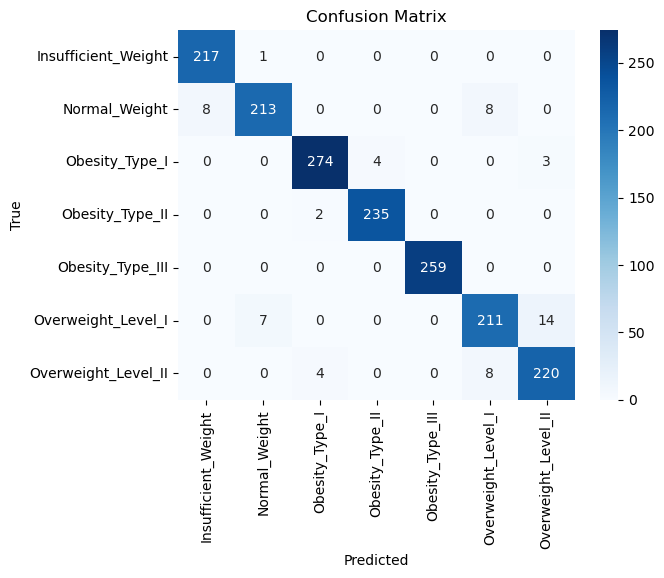

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, classification_report, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_train)
y_proba = grid_search.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  

In [89]:
# crossvalidation results
print_search_results(grid_search, name="Logistic Regression (grid_search)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.946904,0.910419,0.946413,0.955317,0.928396,0.937490,0.016134,1,{'classifier__C': 10},0.066298,0.002490
1,0.893839,0.848234,0.861484,0.872443,0.876865,0.870573,0.015271,2,{'classifier__C': 1},0.047536,0.004054
2,0.772286,0.749565,0.748030,0.755055,0.759069,0.756801,0.008686,3,{'classifier__C': 0.1},0.039388,0.003924
3,0.665360,0.601809,0.572717,0.628907,0.653527,0.624464,0.033846,4,{'classifier__C': 0.01},0.018934,0.003716


In [80]:
# print(grid_search.best_estimator_)
with open("best_logistic_regression_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)

### KNN

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier()

pipe_knn = Pipeline(steps = [
    ('preprocessor', preprocessor_scaling),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3,5,7,9,15,20,25,30],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1,2]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    pipe_knn,
    param_grid_knn,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asgn/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; tota

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__n_neighbors': [3, 5, ...], 'classifier__p': [1, 2], 'classifier__weights': ['uniform', 'distance']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
MCC: 1.0
AUC: 1.0

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       218
      Normal_Weight       1.00      1.00      1.00       229
     Obesity_Type_I       1.00      1.00      1.00       281
    Obesity_Type_II       1.00      1.00      1.00       237
   Obesity_Type_III       1.00      1.00      1.00       259
 Overweight_Level_I       1.00      1.00      1.00       232
Overweight_Level_II       1.00      1.00      1.00       232

           accuracy                           1.00      1688
          macro avg       1.00      1.00      1.00      1688
       weighted avg       1.00      1.00      1.00      1688


Confusion Matrix:


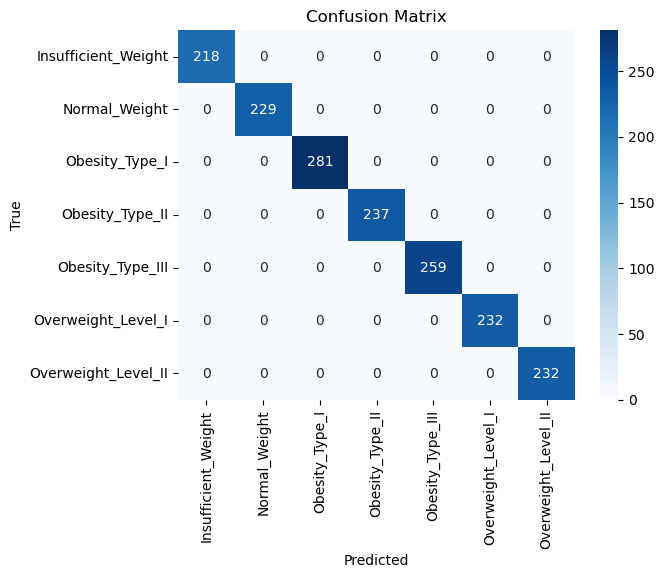

In [98]:
y_pred = grid_search_knn.best_estimator_.predict(X_train)
y_proba = grid_search_knn.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# # Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  

In [91]:

# call for both searches (they should already be fit)
print_search_results(grid_search_knn, name="KNN (grid_search_knn)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.890290,0.882000,0.847631,0.885838,0.890093,0.879171,0.016063,1,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.008353,0.026527
1,0.886965,0.870853,0.859173,0.883843,0.887329,0.877633,0.011013,2,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.008214,0.047637
2,0.879959,0.870359,0.850611,0.858278,0.884014,0.868644,0.012648,3,"{'classifier__n_neighbors': 5, 'classifier__p'...",0.006319,0.010190
3,0.877354,0.849291,0.838396,0.863582,0.871724,0.860069,0.014373,4,"{'classifier__n_neighbors': 7, 'classifier__p'...",0.005796,0.009936
4,0.874717,0.848498,0.825933,0.863078,0.861491,0.854743,0.016631,5,"{'classifier__n_neighbors': 9, 'classifier__p'...",0.004765,0.011068
5,0.864065,0.858746,0.846485,0.841828,0.861936,0.854612,0.008827,6,"{'classifier__n_neighbors': 5, 'classifier__p'...",0.004558,0.008562
6,0.855489,0.830411,0.834729,0.854312,0.865108,0.848010,0.013222,7,"{'classifier__n_neighbors': 7, 'classifier__p'...",0.005621,0.007741
7,0.854630,0.826495,0.820161,0.857722,0.861898,0.844181,0.017299,8,"{'classifier__n_neighbors': 15, 'classifier__p...",0.004831,0.011993
8,0.879512,0.828969,0.816670,0.843706,0.839683,0.841708,0.021102,9,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.005745,0.007575
9,0.860669,0.812546,0.822290,0.834077,0.844695,0.834855,0.016849,10,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.004651,0.006320


In [92]:
# print(grid_search.best_estimator_)
with open("best_knn_model.pkl", "wb") as f:
    pickle.dump(grid_search_knn.best_estimator_, f)

### Naive Bayes

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-12; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-10; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoo

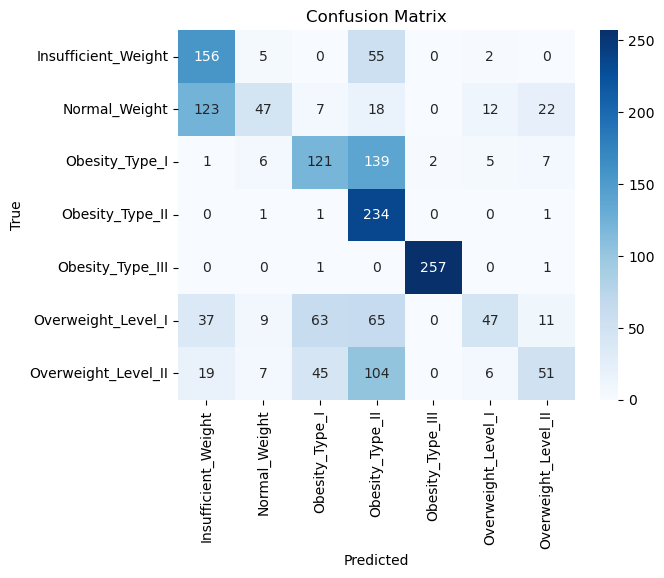

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.455983,0.428500,0.461055,0.483980,0.467942,0.459492,0.018146,1,{'classifier__var_smoothing': 1e-07},0.004962,0.002305
1,0.446268,0.430353,0.455621,0.457395,0.467051,0.451338,0.012393,2,{'classifier__var_smoothing': 1e-08},0.005504,0.003338
2,0.440355,0.428104,0.453776,0.447607,0.464966,0.446962,0.012412,3,{'classifier__var_smoothing': 1e-09},0.006443,0.003223
3,0.435603,0.424272,0.427872,0.442417,0.450718,0.436176,0.009606,4,{'classifier__var_smoothing': 1e-10},0.004796,0.002681
4,0.380484,0.413195,0.410948,0.432500,0.424964,0.412418,0.017795,5,{'classifier__var_smoothing': 1e-12},0.005304,0.002593


In [99]:
from sklearn.naive_bayes import GaussianNB

pipe_gnb = Pipeline(steps = [
    ('preprocessor', preprocessor_scaling),
    ('classifier', GaussianNB())
])

# pipe_gnb.fit(X_train, y_train)

param_grid_gnb = {
    'classifier__var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-7]
}

grid_search_gnb = GridSearchCV(
    pipe_gnb,
    param_grid_gnb,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_gnb.fit(X_train, y_train)

print(grid_search_gnb.best_estimator_)
print(grid_search_gnb.best_params_)
print(grid_search_gnb.best_score_)

y_pred = grid_search_gnb.best_estimator_.predict(X_train)
y_proba = grid_search_gnb.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# # Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  
# crossvalidation results
print_search_results(grid_search_gnb, name="GaussianNB (grid_search_gnb)")

with open("best_gaussian_nb_model.pkl", "wb") as f:
    pickle.dump(grid_search_gnb.best_estimator_, f)

The naive Bayes model is performing very poorly as multiple assumptions are broken:
1. GaussianNB expects continuous data: the data type is mixed,
2. GaussianNB expects all features to be normally distributed, but as we saw in the initial EDA, a lot of the numeric features are not normal.



### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.0s
[CV] END classifier__criterion=gini, classif

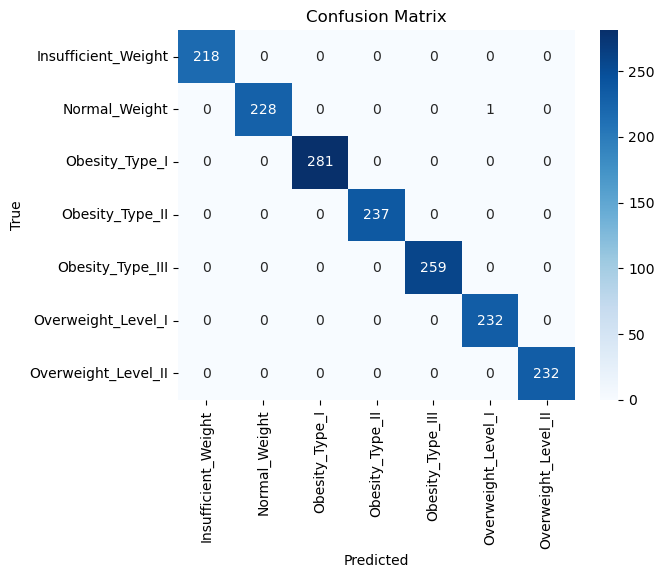

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       229
           2       1.00      1.00      1.00       281
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00       232
           6       1.00      1.00      1.00       232

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.967571,0.964601,0.937877,0.925972,0.940475,0.947299,0.016127,1,"{'classifier__criterion': 'entropy', 'classifi...",0.010598,0.003298
1,0.964603,0.958737,0.937665,0.925972,0.940475,0.945491,0.014199,2,"{'classifier__criterion': 'entropy', 'classifi...",0.011559,0.003077
2,0.964603,0.958737,0.937665,0.925972,0.940475,0.945491,0.014199,2,"{'classifier__criterion': 'entropy', 'classifi...",0.015130,0.003519
3,0.964603,0.958737,0.937665,0.925972,0.940475,0.945491,0.014199,2,"{'classifier__criterion': 'entropy', 'classifi...",0.011401,0.002951
4,0.952621,0.961503,0.934692,0.916990,0.940547,0.941270,0.015307,5,"{'classifier__criterion': 'entropy', 'classifi...",0.011174,0.003131
...,...,...,...,...,...,...,...,...,...,...,...
85,0.849214,0.839265,0.805891,0.789606,0.822861,0.821367,0.021662,85,"{'classifier__criterion': 'gini', 'classifier_...",0.006760,0.002709
86,0.849214,0.839265,0.805891,0.789606,0.822861,0.821367,0.021662,85,"{'classifier__criterion': 'gini', 'classifier_...",0.007613,0.002934
87,0.848612,0.833686,0.805891,0.776360,0.820111,0.816932,0.024748,88,"{'classifier__criterion': 'gini', 'classifier_...",0.007085,0.002283
88,0.848612,0.833686,0.805891,0.776360,0.820111,0.816932,0.024748,88,"{'classifier__criterion': 'gini', 'classifier_...",0.006563,0.002431


In [102]:
pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_dt.fit(X_train, y_train)

print(grid_search_dt.best_estimator_)
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

y_pred = grid_search_dt.best_estimator_.predict(X_train)
y_proba = grid_search_dt.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# # Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  

print("Training Set Performance:")
y_train_pred = grid_search_dt.best_estimator_.predict(X_train)
print(classification_report(y_train, y_train_pred))

print_search_results(grid_search_dt, name="Decision Tree (grid_search_dt)")

with open("best_decision_tree_model.pkl", "wb") as f:
    pickle.dump(grid_search_dt.best_estimator_, f)

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_dep

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__max_features': ['sqrt', 'log2'], 'classifier__min_samples_leaf': [1, 2], 'classifier__min_samples_split': [2, 5], ...}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 RandomForestClassifier(min_sam

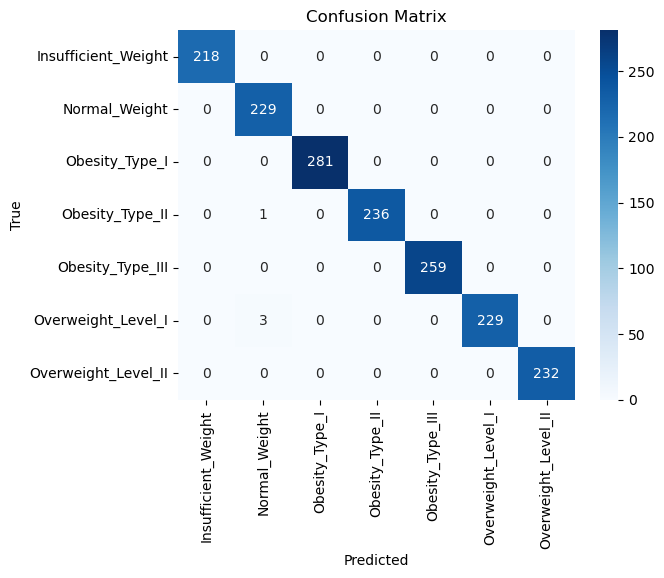

In [107]:
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

print("Training Set Performance:")
y_pred = grid_search_rf.best_estimator_.predict(X_train)
y_proba = grid_search_rf.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# # Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  

In [108]:
print_search_results(grid_search_rf, name="Random Forest (grid_search_rf)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.947884,0.950803,0.935709,0.932278,0.929530,0.939241,0.008528,1,"{'classifier__max_depth': 20, 'classifier__max...",0.317433,0.014212
1,0.947884,0.950803,0.935709,0.932278,0.929530,0.939241,0.008528,1,"{'classifier__max_depth': None, 'classifier__m...",0.266756,0.012833
2,0.947884,0.950803,0.935709,0.932278,0.929530,0.939241,0.008528,1,"{'classifier__max_depth': 30, 'classifier__max...",0.333552,0.014089
3,0.939141,0.953312,0.927022,0.935730,0.932561,0.937553,0.008832,4,"{'classifier__max_depth': None, 'classifier__m...",0.138910,0.007487
4,0.939141,0.953312,0.927022,0.935730,0.932561,0.937553,0.008832,4,"{'classifier__max_depth': 30, 'classifier__max...",0.156767,0.008338
...,...,...,...,...,...,...,...,...,...,...,...
59,0.921052,0.917031,0.908430,0.920708,0.899050,0.913254,0.008434,60,"{'classifier__max_depth': 10, 'classifier__max...",0.125597,0.007711
60,0.924237,0.914526,0.900274,0.917588,0.898836,0.911092,0.009940,61,"{'classifier__max_depth': 10, 'classifier__max...",0.268465,0.012956
61,0.918425,0.920398,0.900209,0.905167,0.904119,0.909664,0.008153,62,"{'classifier__max_depth': 10, 'classifier__max...",0.125926,0.008305
62,0.918261,0.910479,0.899732,0.911138,0.905111,0.908944,0.006221,63,"{'classifier__max_depth': 10, 'classifier__max...",0.147009,0.007007


In [109]:
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(grid_search_rf.best_estimator_, f)

### XGBoost

In [111]:
from xgboost import XGBClassifier

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__lea

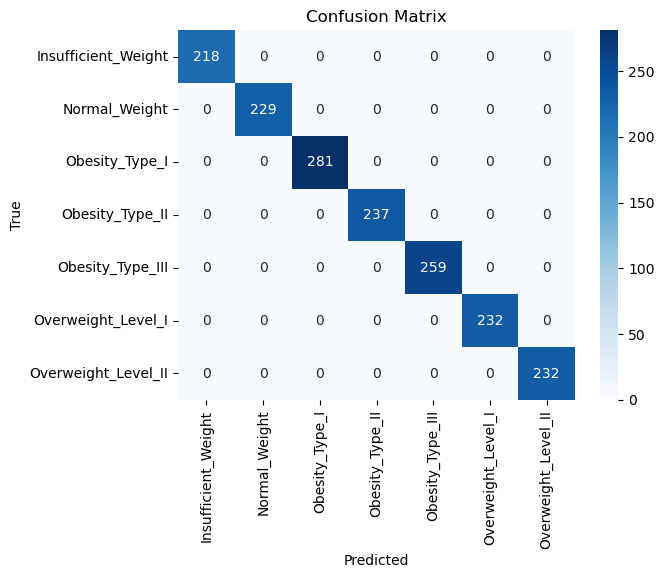

In [114]:
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        num_class=len(label_encoder.classes_),   # must match your dataset
        eval_metric='mlogloss',
        random_state=42
    ))
])
param_grid_xgb = {
    'classifier__n_estimators': [100, 150,200],
    'classifier__max_depth': [3, 6, 10, 15],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    pipe_xgb,
    param_grid_xgb,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_estimator_)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)


print("Training Set Performance:")
y_pred = grid_search_xgb.best_estimator_.predict(X_train)
y_proba = grid_search_xgb.best_estimator_.predict_proba(X_train)

# Decode labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_train)

# # Metrics (encoded)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average="weighted")
recall = recall_score(y_train, y_pred, average="weighted")
f1 = f1_score(y_train, y_pred, average="weighted")
mcc = matthews_corrcoef(y_train, y_pred)

auc = roc_auc_score(
    y_train,
    y_proba,
    multi_class="ovr",
    average="weighted"
)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("MCC:", mcc)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()  

In [115]:
print_search_results(grid_search_xgb, name="XGBoost (grid_search_xgb)")

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params,mean_fit_time,mean_score_time
0,0.976359,0.982243,0.970285,0.967514,0.973092,0.973898,0.005102,1,"{'classifier__colsample_bytree': 0.8, 'classif...",0.341791,0.005626
1,0.976359,0.979319,0.970224,0.970454,0.973092,0.973890,0.003506,2,"{'classifier__colsample_bytree': 0.8, 'classif...",0.278631,0.006160
2,0.976422,0.979221,0.967420,0.967567,0.973166,0.972759,0.004707,3,"{'classifier__colsample_bytree': 0.8, 'classif...",0.246298,0.005162
3,0.973495,0.976298,0.976219,0.964386,0.973090,0.972698,0.004364,4,"{'classifier__colsample_bytree': 0.8, 'classif...",0.325158,0.006528
4,0.976327,0.982245,0.961563,0.967427,0.973166,0.972146,0.007139,5,"{'classifier__colsample_bytree': 0.8, 'classif...",0.189013,0.004842
...,...,...,...,...,...,...,...,...,...,...,...
91,0.841762,0.858271,0.792036,0.843606,0.828495,0.832834,0.022477,92,"{'classifier__colsample_bytree': 1.0, 'classif...",0.247444,0.009379
92,0.822185,0.855357,0.779587,0.839422,0.803441,0.819998,0.026606,93,"{'classifier__colsample_bytree': 1.0, 'classif...",0.314861,0.005553
93,0.819712,0.830586,0.798773,0.837024,0.802501,0.817719,0.015052,94,"{'classifier__colsample_bytree': 0.8, 'classif...",0.135253,0.003894
94,0.822098,0.840518,0.779188,0.804966,0.806351,0.810624,0.020316,95,"{'classifier__colsample_bytree': 1.0, 'classif...",0.149672,0.004918


In [116]:
with open("best_xgboost_model.pkl", "wb") as f:
    pickle.dump(grid_search_xgb.best_estimator_, f)